## About Dataset

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

## Objectives

in this project, we aim to develop a deep learning model using a Convolutional Neural Network (CNN) to classify fashion items from the Fashion MNIST dataset. The dataset consists of grayscale images representing various clothing items such as dresses, shoes, shirts, and more. The primary objective is to build a model that accurately identifies these items based on their visual features.

## Loading data

In [1]:
import random 

import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import PIL
import PIL.Image
from PIL import Image, ImageOps
import tensorflow as tf

import keras
from keras.preprocessing import image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img 
from keras.models import Model
from keras.layers import Input, Dense
from tensorflow.keras.datasets import fashion_mnist

import cv2

sns.set_context('notebook')
sns.set_style('white')

In [71]:
# This function will allow us to visualize four sample images from the loaded toy image dataset. 
def visualize(x_train):
    plt.rcParams['figure.figsize'] = (6,6) 

    for i in range(15):
        plt.subplot(5,5,i+1)
        num = random.randint(0, len(x_train))
        plt.imshow(x_train[num], cmap='gray',interpolation='none', vmin=0, vmax=255)
        plt.title("class {}".format(y_train[num]))
    
    plt.tight_layout()

In [2]:
# Print tensorflow version
print(tf.__version__)

# Try !pip install --upgrade tensorflow if the version printed
# is less than 2.9.0

2.10.0


In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [76]:
def visualize(x_train):
    plt.rcParams['figure.figsize'] = (6,6) 

    for i in range(25):
        plt.subplot(5,5,i+1)
        num = random.randint(0, len(x_train))
        plt.imshow(x_train[num], cmap='gray', interpolation='none', vmin=0, vmax=255)
        plt.title("class {}".format(y_train[num]))
    
    plt.tight_layout()

In [7]:
y_test[0]

9

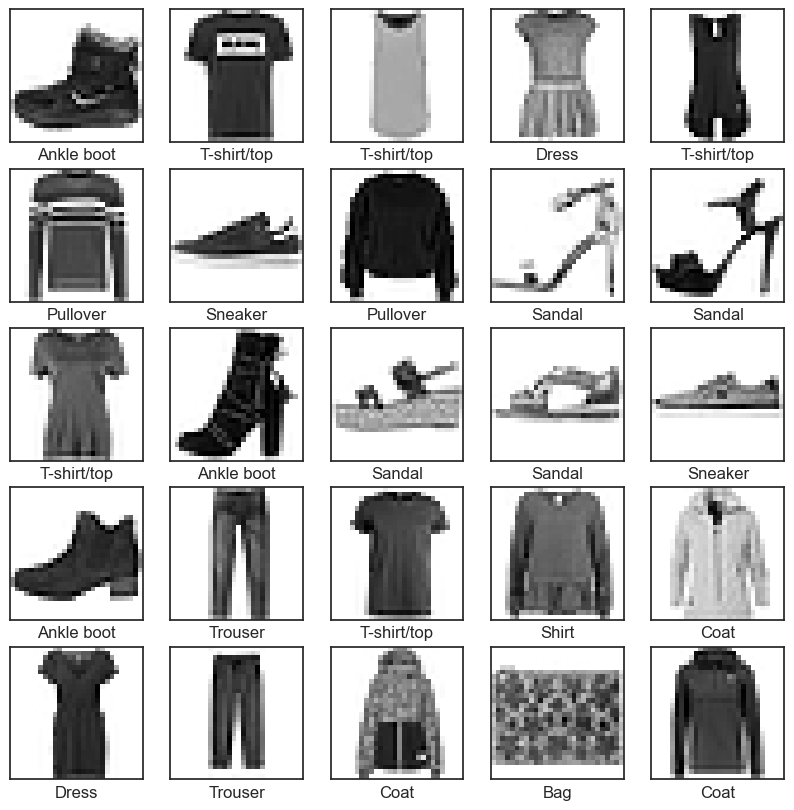

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

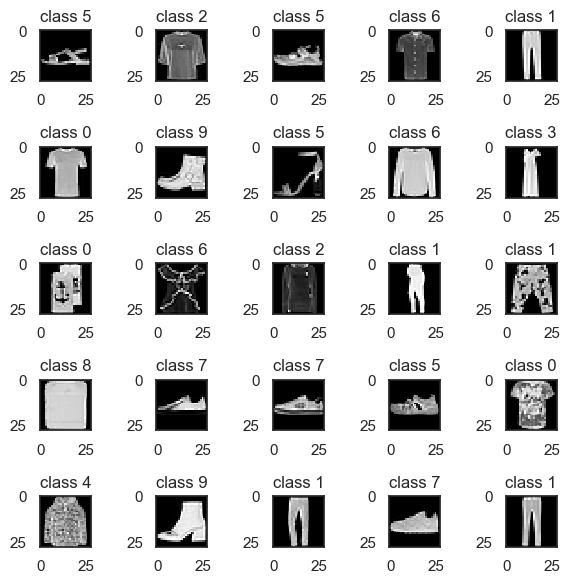

In [13]:

visualize(x_train)


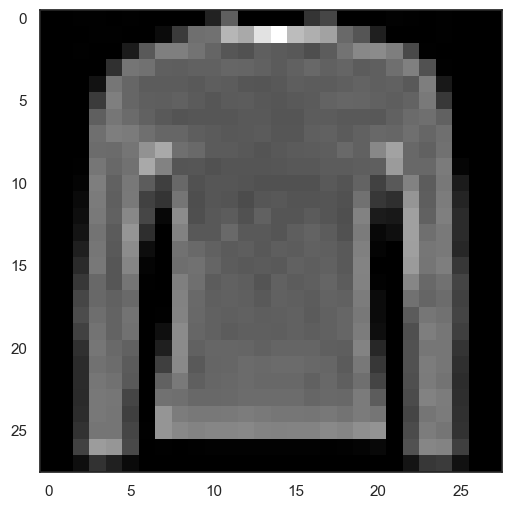

In [79]:
plt.imshow(x_train[37], cmap = 'gray')

### Normalizing

Normalizing a dataset involves scaling the data values to a common range, often between 0 and 1. For the Fashion MNIST dataset, this means dividing each pixel value by 255 to transform it into the [0, 1] range. This ensures consistent and optimal data representation for machine learning algorithms.

## Reshaping

In [80]:
x_train= x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test= x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

In [9]:
# As before, let's make everything float and scale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [18]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(100, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 100)         57700     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 100)        0

In [13]:
batch_size = 32

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=20,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/20


C:\Users\USER\anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1875/1875 [==============================] - 50s 26ms/step - loss: 0.6627 - accuracy: 0.7569 - val_loss: 0.5250 - val_accuracy: 0.7995
Epoch 2/20
1875/1875 [==============================] - 51s 27ms/step - loss: 0.4390 - accuracy: 0.8396 - val_loss: 0.4236 - val_accuracy: 0.8467
Epoch 3/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.3784 - accuracy: 0.8616 - val_loss: 0.4053 - val_accuracy: 0.8564
Epoch 4/20
1875/1875 [==============================] - 48s 26ms/step - loss: 0.3391 - accuracy: 0.8755 - val_loss: 0.3858 - val_accuracy: 0.8622
Epoch 5/20
1875/1875 [==============================] - 40s 21ms/step - loss: 0.3114 - accuracy: 0.8857 - val_loss: 0.3388 - val_accuracy: 0.8790
Epoch 6/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2885 - accuracy: 0.8934 - val_loss: 0.3258 - val_accuracy: 0.8804
Epoch 7/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2680 - accuracy: 0.9007 - val_loss: 0.3472 - val_accura

In [14]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.3869 - accuracy: 0.8944
Test Loss: 0.386897474527359
Test Accuracy: 0.8944000005722046


In [89]:
batch_size = 32


# Let's train the model using RMSprop
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/15
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2124 - accuracy: 0.9228 - val_loss: 0.3728 - val_accuracy: 0.8804
Epoch 2/15
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1933 - accuracy: 0.9288 - val_loss: 0.3493 - val_accuracy: 0.8881
Epoch 3/15
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1789 - accuracy: 0.9341 - val_loss: 0.3849 - val_accuracy: 0.8808
Epoch 4/15
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1720 - accuracy: 0.9360 - val_loss: 0.3342 - val_accuracy: 0.8980
Epoch 5/15
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1607 - accuracy: 0.9387 - val_loss: 0.3748 - val_accuracy: 0.8866
Epoch 6/15
1875/1875 [==============================] - 48s 26ms/step - loss: 0.1506 - accuracy: 0.9431 - val_loss: 0.3891 - val_accuracy: 0.8910
Epoch 7/15
1875/1875 [==============================] - 48s 25ms/step - loss: 0.1412 - accuracy: 0.9466 - val_loss: 0.3924 -

In [90]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

313/313 [==============================] - 3s 9ms/step - loss: 0.4775 - accuracy: 0.8958
Test Loss: 0.477478951215744
Test Accuracy: 0.895799994468689


In [15]:
predictions = model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


In [16]:
 predictions

array([[4.9750959e-09, 2.9603429e-15, 7.5643473e-15, ..., 7.4994306e-05,
        8.7188756e-11, 9.9992460e-01],
       [1.3732287e-06, 6.0269266e-17, 9.9995071e-01, ..., 3.7791044e-15,
        3.5589663e-12, 7.9834406e-16],
       [1.4951540e-15, 9.9999994e-01, 1.0620653e-14, ..., 5.8384762e-21,
        7.9122155e-17, 1.1758099e-14],
       ...,
       [3.3196632e-15, 1.0251327e-15, 5.8055294e-17, ..., 1.2750047e-16,
        9.9999994e-01, 2.8173586e-17],
       [1.4788820e-12, 9.9999994e-01, 6.0849359e-12, ..., 3.6878653e-19,
        4.3192334e-14, 3.7021320e-14],
       [2.8614586e-08, 1.8934019e-12, 6.1475618e-13, ..., 2.5902247e-01,
        7.9347010e-05, 1.6682386e-06]], dtype=float32)

In [17]:
y_test


array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [18]:
pred_lab= np.argmax(predictions, axis=1)

In [19]:
pred_lab[0:20]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 2, 8, 0],
      dtype=int64)

In [20]:
y_test[5]

1

In [97]:
class_names[9]

'Ankle boot'

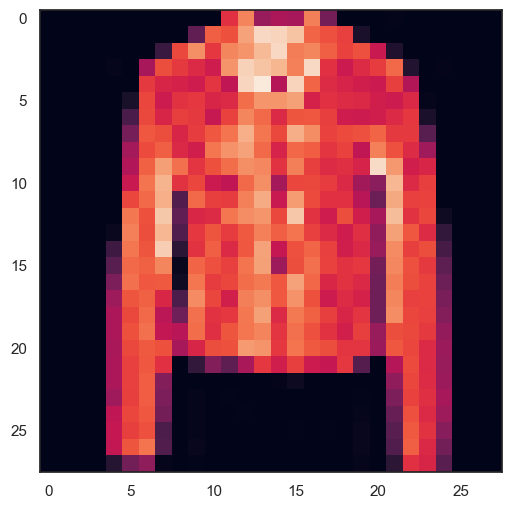

In [51]:
test_prediction = x_test[10]
plt.imshow(test_prediction)

## Improving our model

In [55]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(100, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(14, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 100)       57700     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 100)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 100)        

In [57]:
batch_size = 64


# Let's train the model using RMSprop
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/10
938/938 [==============================] - 84s 88ms/step - loss: 0.6434 - accuracy: 0.7590 - val_loss: 0.4247 - val_accuracy: 0.8452
Epoch 2/10
938/938 [==============================] - 93s 99ms/step - loss: 0.4195 - accuracy: 0.8442 - val_loss: 0.3460 - val_accuracy: 0.8724
Epoch 3/10
938/938 [==============================] - 87s 93ms/step - loss: 0.3667 - accuracy: 0.8647 - val_loss: 0.3224 - val_accuracy: 0.8800
Epoch 4/10
938/938 [==============================] - 87s 93ms/step - loss: 0.3344 - accuracy: 0.8773 - val_loss: 0.3057 - val_accuracy: 0.8858
Epoch 5/10
938/938 [==============================] - 94s 100ms/step - loss: 0.3158 - accuracy: 0.8838 - val_loss: 0.2823 - val_accuracy: 0.8965
Epoch 6/10
938/938 [==============================] - 92s 98ms/step - loss: 0.3002 - accuracy: 0.8906 - val_loss: 0.2675 - val_accuracy: 0.9009
Epoch 7/10
938/938 [==============================] - 96s 102ms/step - loss: 0.2877 - accuracy: 0.8931 - val_loss: 0.2681 - val_accurac

In [78]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

ValueError: in user code:

    File "C:\Users\USER\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\USER\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\USER\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\USER\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1667, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\USER\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\USER\anaconda3\envs\tf\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\USER\anaconda3\envs\tf\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\USER\anaconda3\envs\tf\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\USER\anaconda3\envs\tf\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\USER\anaconda3\envs\tf\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [59]:
predictions_1 = model.predict(x_test)

313/313 [==============================] - 4s 13ms/step


In [63]:
pred_lab1= np.argmax(predictions_1, axis=1)
pred_lab1[0:20],pred_lab[0:20]

(array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 4, 8, 0],
       dtype=int64),
 array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 6, 5, 5, 3, 4, 1, 2, 4, 8, 0],
       dtype=int64))

In [29]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

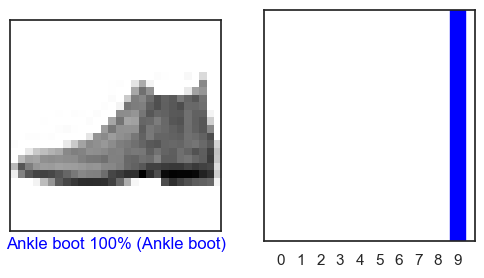

In [30]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

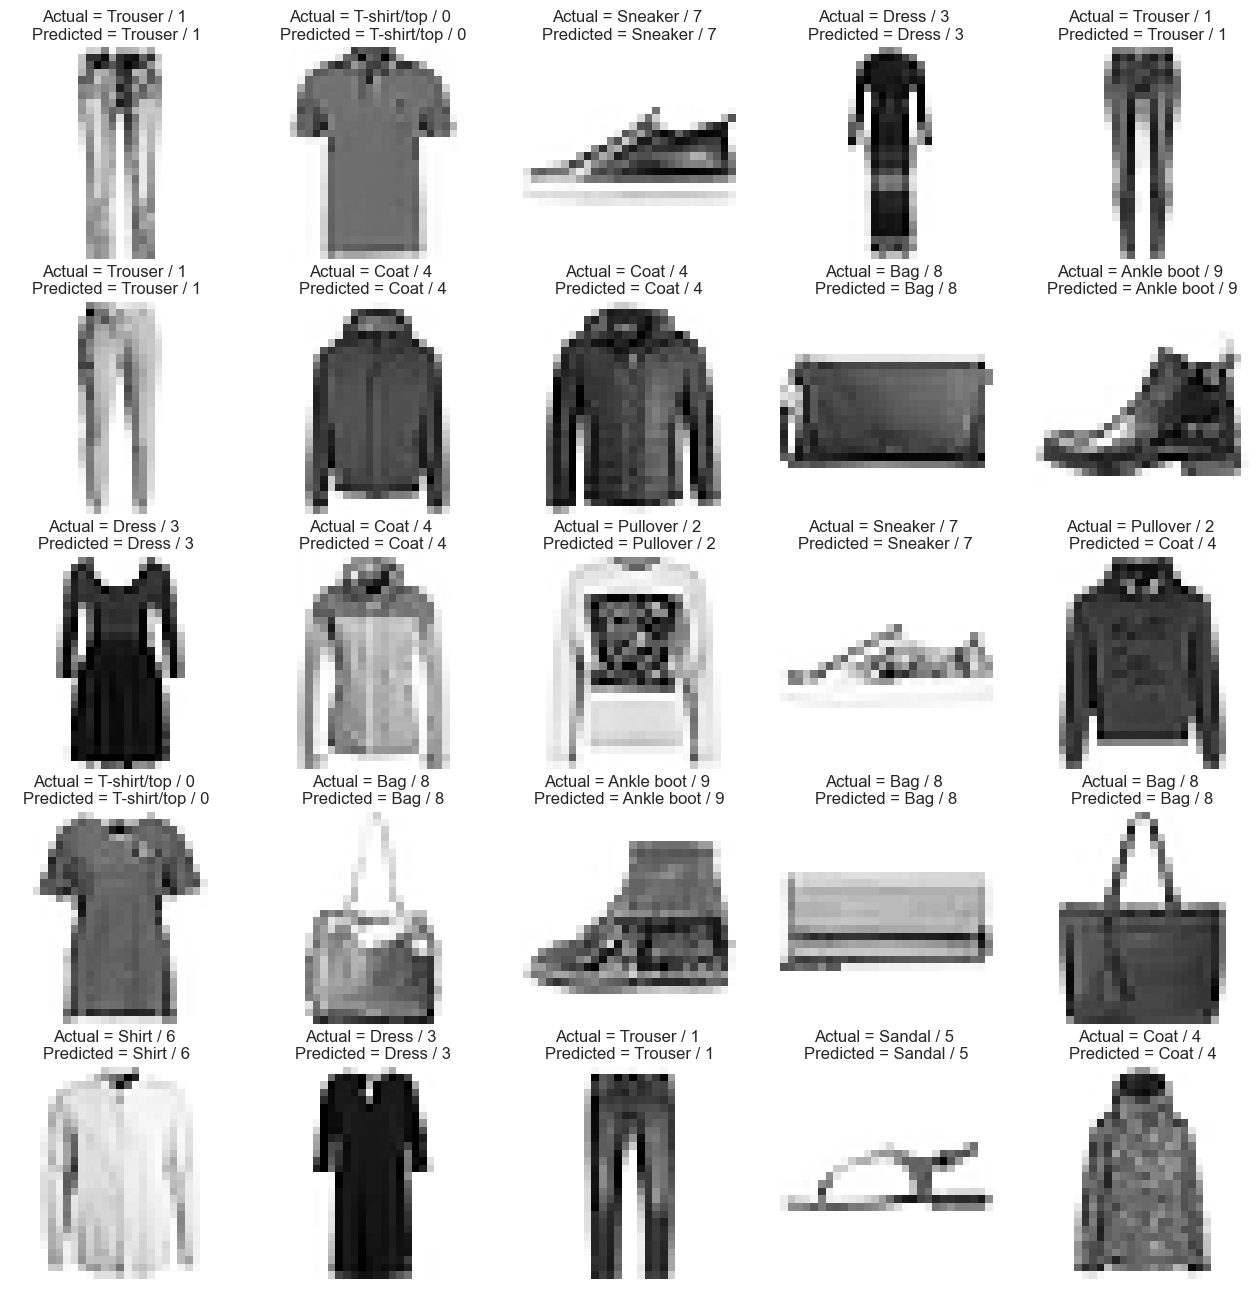

In [26]:
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(x_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_names[y_test[i]], y_test[i], class_names[np.argmax(predictions[i])],np.argmax(predictions[i])))
  plt.axis('off')